# Exploratory Data Analysis

In [1]:
# import needed modules
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
persistency_colors = {"PERSISTENT": "teal", "NON-PERSISTENT": "coral"}

There are 3,424 entries in the data set.

## Demographics

In [3]:
demographics = pd.read_csv('datasets/demographic_details.csv')
demographics

,id,persistency_flag,gender,race,ethnicity,region,age_bucket
0,P1,PERSISTENT,MALE,CAUCASIAN,NOT HISPANIC,WEST,>75
1,P2,NON-PERSISTENT,MALE,ASIAN,NOT HISPANIC,WEST,55-65
2,P3,NON-PERSISTENT,FEMALE,OTHER/UNKNOWN,HISPANIC,MIDWEST,65-75
3,P4,NON-PERSISTENT,FEMALE,CAUCASIAN,NOT HISPANIC,MIDWEST,>75
4,P5,NON-PERSISTENT,FEMALE,CAUCASIAN,NOT HISPANIC,MIDWEST,>75
...,...,...,...,...,...,...,...
3419,P3420,PERSISTENT,FEMALE,CAUCASIAN,NOT HISPANIC,SOUTH,>75
3420,P3421,PERSISTENT,FEMALE,CAUCASIAN,NOT HISPANIC,SOUTH,>75
3421,P3422,PERSISTENT,FEMALE,CAUCASIAN,NOT HISPANIC,SOUTH,>75
3422,P3423,NON-PERSISTENT,FEMALE,CAUCASIAN,NOT HISPANIC,SOUTH,55-65


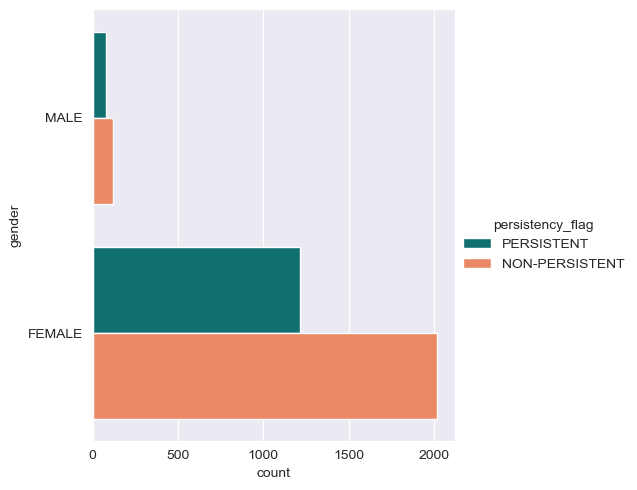

In [4]:
sns.catplot(demographics, y='gender', kind='count', hue='persistency_flag', palette=persistency_colors)

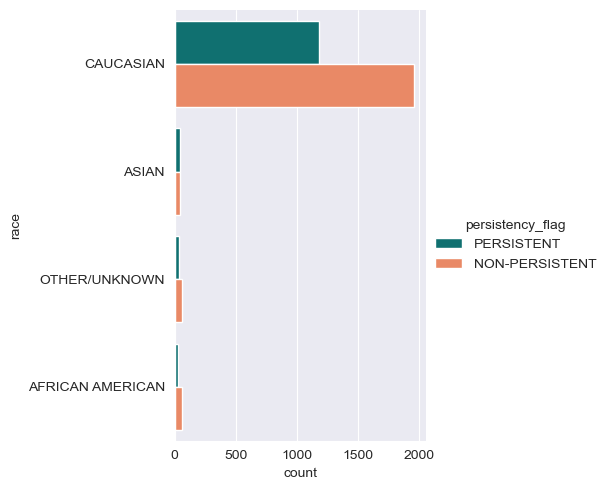

In [5]:
sns.catplot(demographics, y='race', kind='count', hue='persistency_flag', palette=persistency_colors)

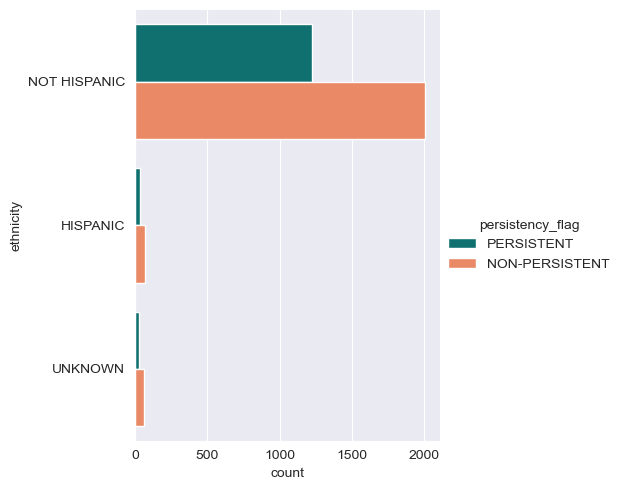

In [6]:
sns.catplot(demographics, y='ethnicity', kind='count', hue='persistency_flag', palette=persistency_colors)

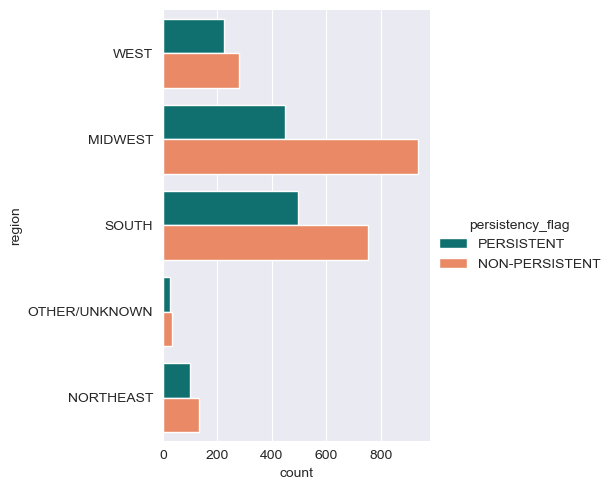

In [7]:
sns.catplot(demographics, y='region', kind='count', hue='persistency_flag', palette=persistency_colors)

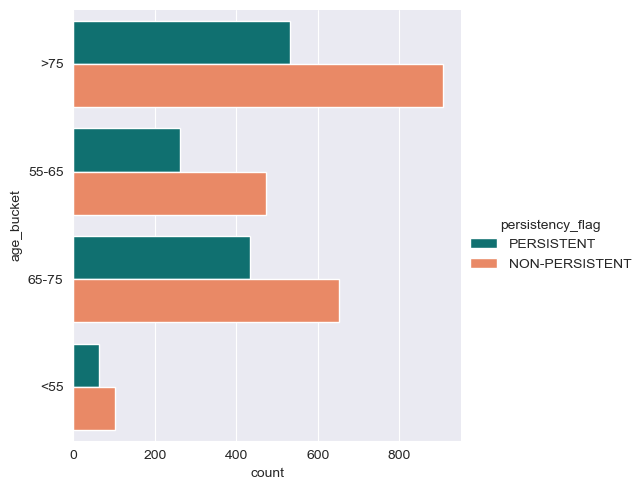

In [8]:
sns.catplot(demographics, y='age_bucket', kind='count', hue='persistency_flag', palette=persistency_colors)

In [9]:
# create dummy variables for categorical variables
df = pd.get_dummies(demographics, columns=['gender', 'race', 'ethnicity', 'region', 'age_bucket'])
df = df.drop(columns=['id'])

In [10]:
# define the target variable and predictor variables
target = 'persistency_flag'
predictors = df.columns.drop(labels=[target])
df[target] = df[target].map({'NON-PERSISTENT': 0, 'PERSISTENT': 1})

In [11]:
df[predictors].corrwith(df[target]).sort_values(ascending=False)

region_WEST               0.057971
race_ASIAN                0.036541
age_bucket_65-75          0.031300
region_SOUTH              0.030759
region_NORTHEAST          0.025571
ethnicity_NOT HISPANIC    0.024155
region_OTHER/UNKNOWN      0.011083
gender_MALE               0.010343
age_bucket_<55            0.001425
race_CAUCASIAN           -0.000215
gender_FEMALE            -0.010343
age_bucket_>75           -0.011878
race_OTHER/UNKNOWN       -0.012777
ethnicity_UNKNOWN        -0.015957
ethnicity_HISPANIC       -0.017690
race_AFRICAN AMERICAN    -0.021154
age_bucket_55-65         -0.021964
region_MIDWEST           -0.088015
dtype: float64

In [12]:
df[predictors].corrwith(df[target]).sort_values(ascending=False).sum()

0.02915326158546705

In [13]:
# add a constant term to the predictors
predictors_with_constant = sm.add_constant(df[predictors])

# fit the logistic regression model
model = sm.Logit(df[target], predictors_with_constant)
result = model.fit(maxiter=10000)

# print the summary of the model
print(result.summary())

         Current function value: 0.656187
         Iterations: 10000
                           Logit Regression Results                           
Dep. Variable:       persistency_flag   No. Observations:                 3424
Model:                          Logit   Df Residuals:                     3410
Method:                           MLE   Df Model:                           13
Date:                Sun, 14 May 2023   Pseudo R-squ.:                0.009237
Time:                        21:20:06   Log-Likelihood:                -2246.8
converged:                      False   LL-Null:                       -2267.7
Covariance Type:            nonrobust   LLR p-value:                 6.814e-05
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2159   4.01e+06  -5.39e-08      1.000   -7.86e+06    7.86e+06
gender_FEMALE             

/Users/lihadaway/opt/anaconda3/envs/data-analysis/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Provider Attributes

In [14]:
provider_attributes = pd.read_csv('datasets/provider_attributes.csv')
provider_attributes

,id,persistency_flag,ntm_speciality,ntm_specialist_flag,ntm_speciality_bucket,idn_indicator
0,P1,PERSISTENT,GENERAL PRACTITIONER,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,N
1,P2,NON-PERSISTENT,GENERAL PRACTITIONER,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,N
2,P3,NON-PERSISTENT,GENERAL PRACTITIONER,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,N
3,P4,NON-PERSISTENT,GENERAL PRACTITIONER,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,N
4,P5,NON-PERSISTENT,GENERAL PRACTITIONER,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,N
...,...,...,...,...,...,...
3419,P3420,PERSISTENT,GENERAL PRACTITIONER,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,Y
3420,P3421,PERSISTENT,UNKNOWN,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,Y
3421,P3422,PERSISTENT,ENDOCRINOLOGY,SPECIALIST,ENDO/ONC/URO,Y
3422,P3423,NON-PERSISTENT,UNKNOWN,OTHERS,OB/GYN/OTHERS/PCP/UNKNOWN,Y


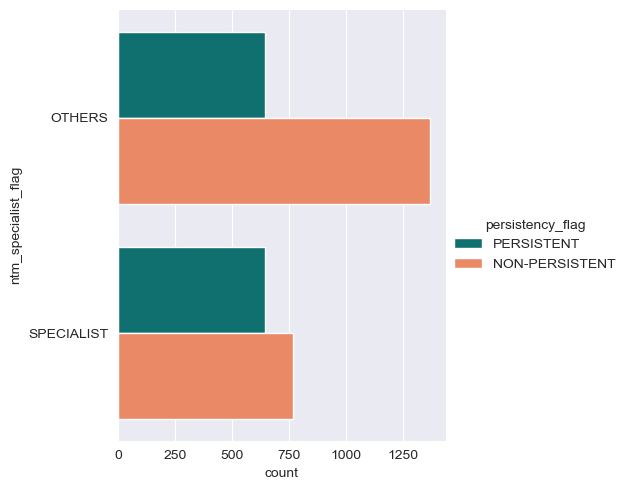

In [15]:
sns.catplot(provider_attributes, y='ntm_specialist_flag', kind='count', hue='persistency_flag', palette=persistency_colors)

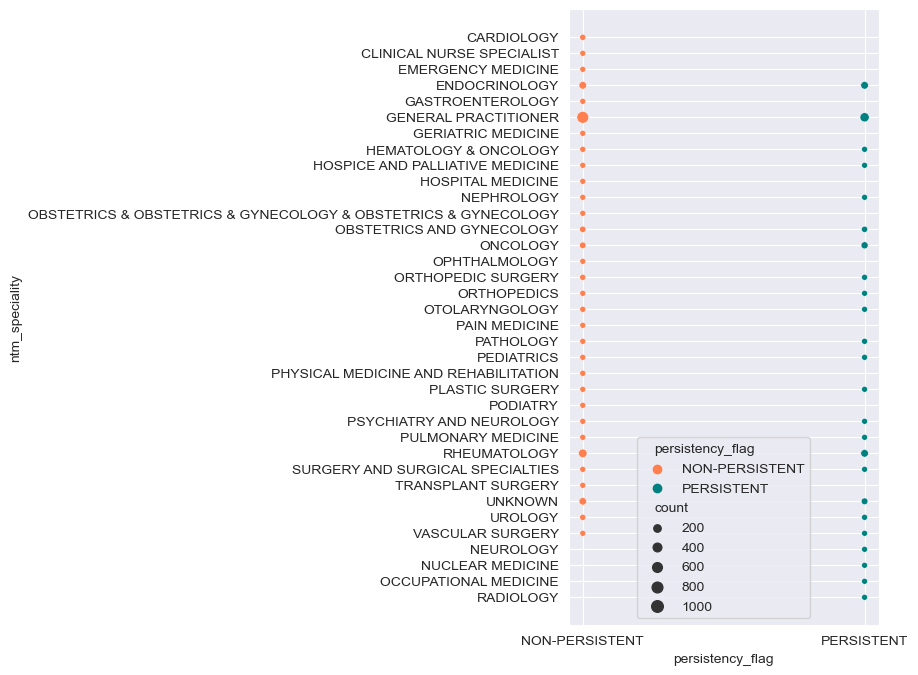

In [16]:
# create a pivot table to calculate the count of 'id' values for each combination of 'persistency_flag' and 'ntm_speciality'
persistency_flag_ntm_speciality_count = provider_attributes.pivot_table(index=['persistency_flag', 'ntm_speciality'], values='id', aggfunc='count').reset_index().rename(columns={'id': 'count'})

# create a scatter plot using Seaborn
fig = plt.figure(figsize=(4, 8))  # set figure size
fig = sns.scatterplot(persistency_flag_ntm_speciality_count, x='persistency_flag', y='ntm_speciality', size='count', hue='persistency_flag', palette=persistency_colors)

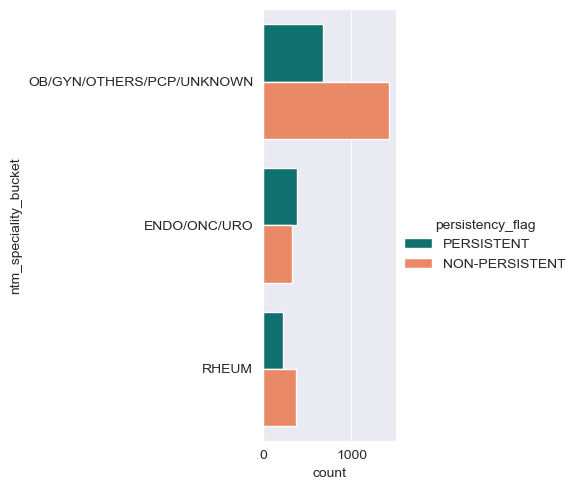

In [23]:
sns.catplot(provider_attributes, y='ntm_speciality_bucket', kind='count', hue='persistency_flag', palette=persistency_colors)

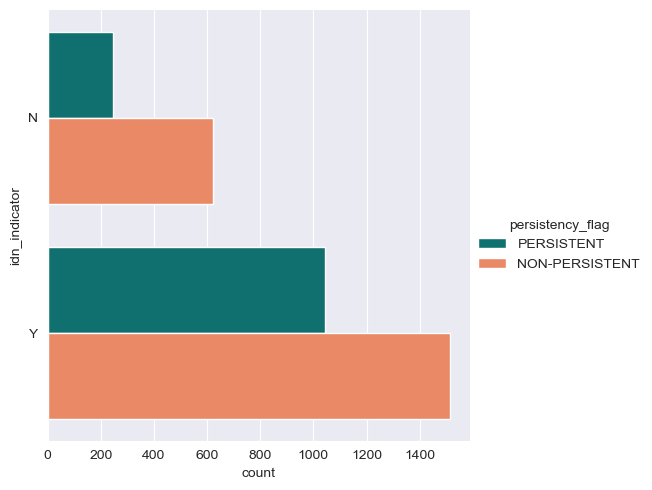

In [18]:
sns.catplot(provider_attributes, y='idn_indicator', kind='count', hue='persistency_flag', palette=persistency_colors)

## Clinical Factors

In [19]:
clinical_factors = pd.read_csv('datasets/clinical_factors.csv')
clinical_factors

,id,persistency_flag,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,risk_segment_prior_ntm,tscore_bucket_prior_ntm,risk_segment_during_rx,tscore_bucket_during_rx,change_t_score,change_risk_segment,adherent_flag,injectable_experience_during_rx
0,P1,PERSISTENT,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,NO CHANGE,UNKNOWN,ADHERENT,Y
1,P2,NON-PERSISTENT,N,N,0,N,N,N,VLR_LR,>-2.5,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ADHERENT,Y
2,P3,NON-PERSISTENT,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,NO CHANGE,NO CHANGE,ADHERENT,Y
3,P4,NON-PERSISTENT,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,NO CHANGE,NO CHANGE,ADHERENT,Y
4,P5,NON-PERSISTENT,Y,Y,0,N,N,N,HR_VHR,<=-2.5,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ADHERENT,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,P3420,PERSISTENT,N,N,0,N,N,N,VLR_LR,>-2.5,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ADHERENT,Y
3420,P3421,PERSISTENT,N,N,0,N,N,N,HR_VHR,<=-2.5,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,NON-ADHERENT,Y
3421,P3422,PERSISTENT,N,N,7,Y,N,N,VLR_LR,>-2.5,HR_VHR,<=-2.5,NO CHANGE,WORSENED,ADHERENT,Y
3422,P3423,NON-PERSISTENT,N,N,0,N,N,Y,VLR_LR,>-2.5,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,ADHERENT,Y


In [20]:
cols = clinical_factors.columns[2:].values.tolist()
cols.remove('dexa_freq_during_rx')

for col in cols:
    print(f"Value counts for {col}:")
    print(clinical_factors[col].value_counts())
    print()

Value counts for gluco_record_prior_ntm:
N    2619
Y     805
Name: gluco_record_prior_ntm, dtype: int64

Value counts for gluco_record_during_rx:
N    2522
Y     902
Name: gluco_record_during_rx, dtype: int64

Value counts for dexa_during_rx:
N    2488
Y     936
Name: dexa_during_rx, dtype: int64

Value counts for frag_frac_prior_ntm:
N    2872
Y     552
Name: frag_frac_prior_ntm, dtype: int64

Value counts for frag_frac_during_rx:
N    3007
Y     417
Name: frag_frac_during_rx, dtype: int64

Value counts for risk_segment_prior_ntm:
VLR_LR    1931
HR_VHR    1493
Name: risk_segment_prior_ntm, dtype: int64

Value counts for tscore_bucket_prior_ntm:
>-2.5     1951
<=-2.5    1473
Name: tscore_bucket_prior_ntm, dtype: int64

Value counts for risk_segment_during_rx:
UNKNOWN    1497
HR_VHR      965
VLR_LR      962
Name: risk_segment_during_rx, dtype: int64

Value counts for tscore_bucket_during_rx:
UNKNOWN    1497
<=-2.5     1017
>-2.5       910
Name: tscore_bucket_during_rx, dtype: int64

Val

<AxesSubplot: xlabel='count', ylabel='adherent_flag'>

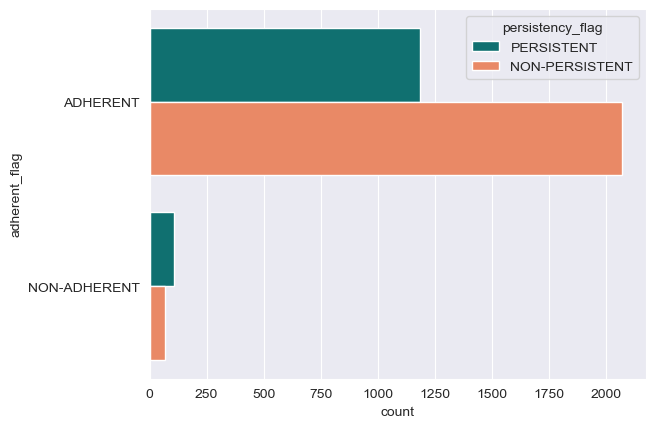

In [21]:
sns.countplot(clinical_factors, y='adherent_flag', hue='persistency_flag', palette=persistency_colors)

In [22]:
clinical_factors.pivot_table(columns='persistency_flag',values='dexa_freq_during_rx', aggfunc='describe')

persistency_flag,NON-PERSISTENT,PERSISTENT
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,0.000000,9.000000
count,2135.000000,1289.000000
max,110.000000,146.000000
mean,0.896956,6.525989
min,0.000000,0.000000
std,4.695774,10.937832
